In [1]:
from Models_Util import *
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Data/final_data.csv', index_col=0)

In [3]:
data.columns

Index(['problem', 'level', 'type', 'modified_problem', 'no_of_equations',
       'no_of_variables', 'has_mod', 'has_logarithm', 'has_fraction', 'has_eq',
       'has_neq', 'mod_count', 'log_count', 'fracs_count', 'eqlts_count',
       'neqlts_count', 'max_degree_of_equations', 'sentence_count',
       'word_count', 'words_per_sentence', 'average_word_length',
       'large_words', 'has_repeated_large_words', 'ADJ', 'ADP', 'ADV', 'AUX',
       'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN',
       'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'sentence_count_cat',
       'word_count_cat', 'words_per_sentence_cat', 'average_word_length_cat',
       'large_words_cat', 'number_of_math_vocab', 'number_of_digits',
       'number_of_numbers', 'has_digits', 'has_symbol', 'symbol_count',
       'has_exp', 'no_of_exps', 'has_pow', 'no_of_pow'],
      dtype='object')

In [4]:
data.type.value_counts()

Algebra                 1736
Intermediate Algebra    1295
Prealgebra              1205
Name: type, dtype: int64

In [5]:
size_mapping = {"Prealgebra": 1, "Intermediate Algebra": 2, "Algebra": 3}
data['type'] = data['type'].replace(size_mapping)

In [6]:
data.drop(columns = ['problem', 'modified_problem'], inplace = True)

In [7]:
for i in range(data.shape[0]):
  data['level'][i] = data['level'][i][6]

In [8]:
X = data.drop(columns = ['level'])
y = data['level']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2, stratify = y)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluation(y_train_pred, y_test_pred, y_train, y_test):
  print("train_evaluation:\n")
  print(classification_report(y_train_pred, y_train))
  print(confusion_matrix(y_train_pred, y_train))
  print("\ntest_evaluation:\n")
  print(classification_report(y_test_pred, y_test))
  print(confusion_matrix(y_test_pred, y_test))

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
rfc=RandomForestClassifier(n_estimators=25, random_state=42)

In [17]:
param_grid = {
    'max_depth': [3, 5, 7],                     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3],              # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider at each split
    'criterion': ['gini', 'entropy', 'log_loss'],
    'oob_score': [True],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Perform grid search to find the best combination of parameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=25, random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10], 'oob_score': [True]})

In [18]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)
print("OOB Score", grid_search.best_estimator_.oob_score_)

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'oob_score': True}
Best Score:  0.36216215038583377
OOB Score 0.3282172373081464


In [19]:
y_test_pred = grid_search.predict(X_test)
y_train_pred = grid_search.predict(X_train)
evaluation(y_train_pred, y_test_pred, y_train, y_test)

train_evaluation:

              precision    recall  f1-score   support

           1       0.82      0.36      0.50       666
           2       0.47      0.48      0.48       651
           3       0.34      0.58      0.43       442
           4       0.36      0.62      0.45       451
           5       0.71      0.54      0.61      1178

    accuracy                           0.51      3388
   macro avg       0.54      0.52      0.49      3388
weighted avg       0.59      0.51      0.52      3388

[[238 176 122  85  45]
 [ 23 314 117 108  89]
 [ 12  52 258  68  52]
 [  4  36  56 281  74]
 [ 13  87 201 244 633]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.56      0.24      0.33       167
           2       0.25      0.28      0.27       149
           3       0.12      0.24      0.16        92
           4       0.16      0.26      0.20       125
           5       0.62      0.44      0.51       315

    accuracy                   

In [19]:
best_model = grid_search.best_estimator_

In [20]:
import numpy as np

importances = best_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importance rankings
print("Feature Importance Rankings:")
for i, feature in enumerate(X.columns[indices]):
    print(f"{i + 1}. {feature}: {importances[indices[i]] * 100}")

Feature Importance Rankings:
1. no_of_variables: 8.347697830724835
2. word_count: 6.753837851046226
3. Unnamed: 0: 4.514797278144821
4. VERB: 4.414305134289316
5. NOUN: 4.400786452441499
6. ADJ: 4.377721529460981
7. no_of_equations: 4.209967649662734
8. symbol_count: 3.9852175981231204
9. words_per_sentence: 3.965614166374736
10. ADP: 3.592448088430529
11. large_words: 3.1022039196986397
12. large_words_cat: 2.8744994526750105
13. number_of_digits: 2.774825898587084
14. no_of_pow: 2.7168445809306165
15. max_degree_of_equations: 2.646404945078554
16. DET: 2.5171151348875687
17. number_of_math_vocab: 2.3062695120671455
18. number_of_numbers: 2.2524682363368513
19. average_word_length: 2.1454848933946127
20. NUM: 2.137170116501636
21. PUNCT: 2.094812856578695
22. average_word_length_cat: 1.8831248671757868
23. PRON: 1.8109471517009823
24. has_pow: 1.6044676918438323
25. has_symbol: 1.450446612188914
26. AUX: 1.4344781144352126
27. SCONJ: 1.4229386092446057
28. word_count_cat: 1.3891382648

##XGBoost

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4236 entries, 0 to 4235
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                4236 non-null   int64 
 1   level                     4236 non-null   object
 2   type                      4236 non-null   int64 
 3   no_of_equations           4236 non-null   int64 
 4   no_of_variables           4236 non-null   int64 
 5   has_mod                   4236 non-null   bool  
 6   has_logarithm             4236 non-null   bool  
 7   has_fraction              4236 non-null   bool  
 8   has_eq                    4236 non-null   bool  
 9   has_neq                   4236 non-null   bool  
 10  mod_count                 4236 non-null   int64 
 11  log_count                 4236 non-null   int64 
 12  fracs_count               4236 non-null   int64 
 13  eqlts_count               4236 non-null   int64 
 14  neqlts_count            

In [22]:
data.columns

Index(['Unnamed: 0', 'level', 'type', 'no_of_equations', 'no_of_variables',
       'has_mod', 'has_logarithm', 'has_fraction', 'has_eq', 'has_neq',
       'mod_count', 'log_count', 'fracs_count', 'eqlts_count', 'neqlts_count',
       'max_degree_of_equations', 'sentence_count', 'word_count',
       'words_per_sentence', 'average_word_length', 'large_words',
       'has_repeated_large_words', 'ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ',
       'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ',
       'SYM', 'VERB', 'X', 'sentence_count_cat', 'word_count_cat',
       'words_per_sentence_cat', 'average_word_length_cat', 'large_words_cat',
       'number_of_math_vocab', 'number_of_digits', 'number_of_numbers',
       'has_digits', 'has_symbol', 'symbol_count', 'has_exp', 'no_of_exps',
       'has_pow', 'no_of_pow'],
      dtype='object')

In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 5,
    'eval_metric': 'logloss'
}

# Train the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
preds = model.predict(dtest)
predictions = [round(value) for value in preds]

# Decode the predicted labels
predicted_labels = label_encoder.inverse_transform(predictions)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 36.08%


In [24]:
preds = model.predict(dtest)
predictions = [round(value) for value in preds]

# Decode the predicted labels
predicted_test_labels = label_encoder.inverse_transform(predictions)

preds = model.predict(dtrain)
predictions = [round(value) for value in preds]

# Decode the predicted labels
predicted_train_labels = label_encoder.inverse_transform(predictions)

In [25]:
evaluation(predicted_train_labels, predicted_test_labels, y_train, y_test)

train_evaluation:

              precision    recall  f1-score   support

           1       0.30      0.70      0.42       122
           2       0.64      0.44      0.52       960
           3       0.42      0.50      0.46       624
           4       0.39      0.60      0.47       510
           5       0.74      0.56      0.64      1172

    accuracy                           0.53      3388
   macro avg       0.50      0.56      0.50      3388
weighted avg       0.58      0.53      0.54      3388

[[ 86  18   9   6   3]
 [119 424 173 142 102]
 [ 43  89 314 108  70]
 [ 17  48  78 307  60]
 [ 25  86 180 223 658]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.19      0.54      0.29        26
           2       0.46      0.33      0.38       233
           3       0.20      0.28      0.23       134
           4       0.20      0.29      0.24       140
           5       0.62      0.44      0.52       315

    accuracy                   

In [26]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to y_train and transform y_train to integers
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

## Hyper parameter Tuning

In [27]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
parameters = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'eta': [0.1],
    'objective': ['multi:softmax', 'multi:softprob'],
    'num_class': [5],
    'eval_metric': ['mlogloss', 'merror', 'auc']
}

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(xgb_model, parameters, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

# Train the XGBoost model using the best parameters
model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
preds = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Best Parameters:  {'eta': 0.1, 'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'num_class': 5, 'objective': 'multi:softmax'}
Best Score:  0.3589147469110158
Accuracy: 35.85%


In [28]:

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'eta': 0.01,
    'objective': 'multi:softmax',
    'num_class': 5,
    'eval_metric': 'merror'
}

# Train the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
preds = model.predict(dtest)
predictions = [round(value) for value in preds]

# Decode the predicted labels
predicted_labels = label_encoder.inverse_transform(predictions)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 35.26%


In [29]:
preds = model.predict(dtest)
predictions = [round(value) for value in preds]

# Decode the predicted labels
predicted_test_labels = label_encoder.inverse_transform(predictions)

preds = model.predict(dtrain)
predictions = [round(value) for value in preds]

# Decode the predicted labels
predicted_train_labels = label_encoder.inverse_transform(predictions)

evaluation(predicted_train_labels, predicted_test_labels, y_train, y_test)

train_evaluation:

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       256
           1       0.88      0.73      0.80       808
           2       0.76      0.79      0.78       722
           3       0.79      0.91      0.85       681
           4       0.91      0.88      0.90       921

    accuracy                           0.83      3388
   macro avg       0.83      0.85      0.84      3388
weighted avg       0.84      0.83      0.83      3388

[[236   7   7   3   3]
 [ 31 586  87  72  32]
 [ 18  43 573  55  33]
 [  2  16  30 620  13]
 [  3  13  57  36 812]]

test_evaluation:

              precision    recall  f1-score   support

           0       0.26      0.41      0.32        46
           1       0.37      0.33      0.35       183
           2       0.19      0.21      0.20       171
           3       0.25      0.30      0.27       164
           4       0.60      0.47      0.53       284

    accuracy                   

Best Parameters:  {'class_weight': 'balanced', 'learning_rate': 0.1, 'min_child_samples': 20, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score:  0.3615813300915457
train_evaluation:

              precision    recall  f1-score   support

           1       0.98      0.64      0.77       445
           2       0.81      0.72      0.76       747
           3       0.74      0.83      0.78       671
           4       0.73      0.88      0.80       656
           5       0.84      0.86      0.85       869

    accuracy                           0.80      3388
   macro avg       0.82      0.78      0.79      3388
weighted avg       0.81      0.80      0.80      3388

[[283  62  43  40  17]
 [  5 536  79  69  58]
 [  1  32 555  44  39]
 [  0  14  38 575  29]
 [  1  21  39  58 750]]

test_evaluation:

              precision    recall  f1-score   support

           1       0.42      0.28      0.34       107
           2       0.35      0.31      0.33       1

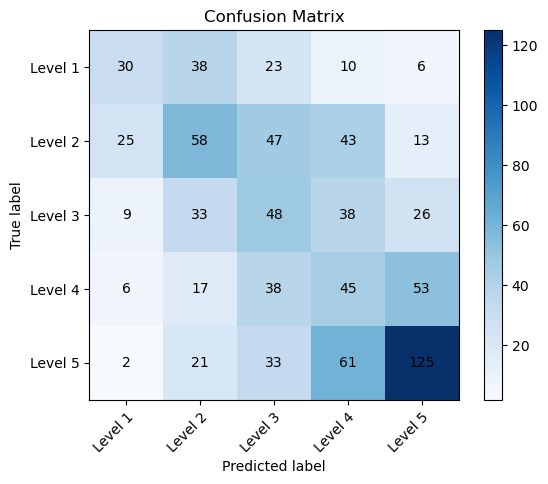

In [11]:
# Defining the results array
scores = pd.DataFrame(columns=['Model','F1_train','F1_test'])
scores = light_GBM(data, scores=scores, experiment="Default Light GBM", use_smote_technique=0)

In [6]:
data.columns

Index(['Unnamed: 0', 'level', 'type', 'no_of_equations', 'no_of_variables',
       'has_mod', 'has_logarithm', 'has_fraction', 'has_eq', 'has_neq',
       'mod_count', 'log_count', 'fracs_count', 'eqlts_count', 'neqlts_count',
       'max_degree_of_equations', 'sentence_count', 'word_count',
       'words_per_sentence', 'average_word_length', 'large_words',
       'has_repeated_large_words', 'ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ',
       'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ',
       'SYM', 'VERB', 'X', 'sentence_count_cat', 'word_count_cat',
       'words_per_sentence_cat', 'average_word_length_cat', 'large_words_cat',
       'number_of_math_vocab', 'number_of_digits', 'number_of_numbers',
       'has_digits', 'has_symbol', 'symbol_count', 'has_exp', 'no_of_exps',
       'has_pow', 'no_of_pow'],
      dtype='object')